<a href="https://colab.research.google.com/github/mihany/Twitter-trend-detection/blob/main/twitter_trend_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy

In [ ]:
pip install textblob

In [8]:
pip install pandas

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [1]:
pip install numpy

In [11]:
import warnings
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

import numpy as np
import pandas as pd
import re

In [ ]:
# Variables that contains the user credentials to access Twitter API 
ACCESS_TOKEN = " "
ACCESS_TOKEN_SECRET = " "
CONSUMER_KEY = " "
CONSUMER_SECRET = " "

# I removed my credentials because it is confidential

In [10]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re


class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

class TwitterStreamer():
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)
        stream.filter(track=hash_tag_list)

class TwitterListener(StreamListener):
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            return False
        print(status)


class TweetAnalyzer():
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    print(df.head(10))


    # Get average length over all tweets:
    print(np.mean(df['len']))

    # Get the number of likes for the most liked tweet:
    print(np.max(df['likes']))

    # Get the number of retweets for the most retweeted tweet:
    print(np.max(df['retweets']))
    
    #print(df.head(10))

    # Time Series
    time_likes = pd.Series(data=df['len'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), color='r')
    plt.show()
    
    #time_favs = pd.Series(data=df['likes'].values, index=df['date'])
    time_favs.plot(figsize=(16, 4), color='r')
    plt.show()

    #time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4), color='r')
    plt.show()

    # Layered Time Series:
    time_likes = pd.Series(data=df['likes'].values, index=df['date'])
    time_likes.plot(figsize=(16, 4), label="likes", legend=True)

    #time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
    time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
    plt.show()

NameError: ignored

In [3]:
furl = 'https://spotleai.sgp1.digitaloceanspaces.com/course/data/tweets_bollywood.txt'
response = requests.get(furl)
tweets = response.text.split("\n")

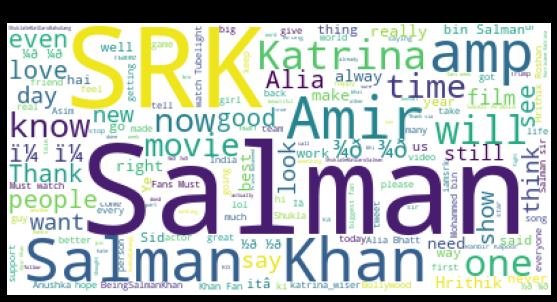

In [6]:
# tweets
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")
word_cloud(tweets)

In [12]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@")]]
df = pd.DataFrame({"tags": tags})

In [13]:
print(df['tags'].value_counts().head(25))

katrina_wiser      811
BeingSalmanKhan    717
iamsrk             444
BiggBoss           253
ColorsTV           237
Neha_hrithik       200
ShivaayXannika     184
RealKrutika        173
iHrithik           165
RepMattGaetz       154
oZaalimaa          136
RepStefanik        135
Vivo_India         133
Sister_Alia        131
yehmalaalishq      126
PDdancing          125
akshaykumar        122
realDonaldTrump    118
sambhavnaseth      113
sidharth_shukla    112
shahrukhdevdas     111
SKFilmsOfficial    109
arbaazSkhan        104
sonakshisinha      104
katrina_hutch      102
Name: tags, dtype: int64


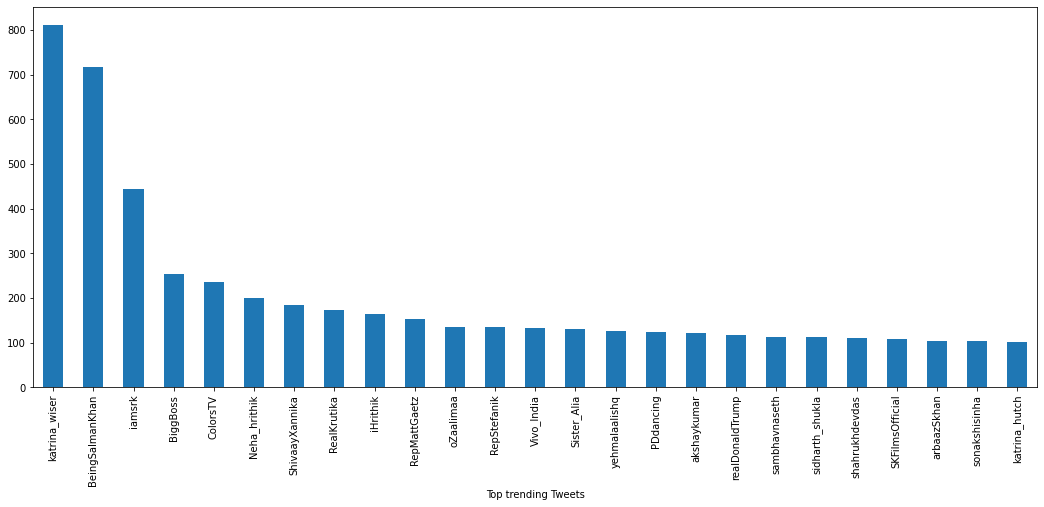

In [14]:
fig, ax = plt.subplots()
plt.xlabel('Top trending Tweets')
df['tags'].value_counts().head(25).plot(ax=ax, kind='bar',figsize=(18,7))

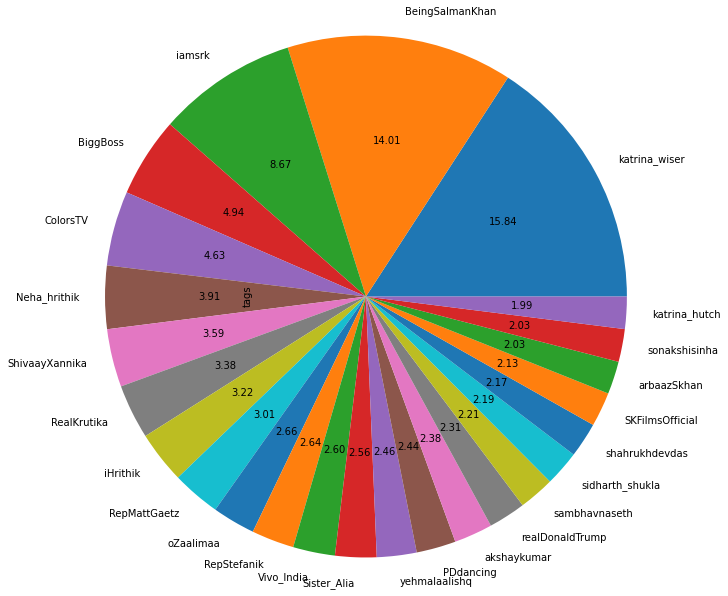

In [15]:
df['tags'].value_counts().head(25).plot(kind='pie', autopct='%.2f', radius=3)

In [16]:
trends=df['tags'].value_counts().head(25);
dictionary = trends.to_dict()
value=list(trends)
trend=[*dictionary]
optimized_trends=['Katrina Kaif','Salmaan Khan','Shahrukh Khan','Salmaan Khan','Others','Neha Hritik','Others','Kritika Yadadv','Hritik Roshan','Others','Shahrukh Khan','Others','Others','Alia Bhatt','Others','Others','Akshay Kumar','Others', 'Sambhavana Seth','Sidharth Shukla', 'Shahrukh Khan', 'Salmaan Khan', 'Arbaaz Khan','Sonakshi Sinha','Katrina kaif']
odf = pd.DataFrame({"tags": trend, 'number':value,'trend':optimized_trends})
print(odf)

               tags  number            trend
0     katrina_wiser     811     Katrina Kaif
1   BeingSalmanKhan     717     Salmaan Khan
2            iamsrk     444    Shahrukh Khan
3          BiggBoss     253     Salmaan Khan
4          ColorsTV     237           Others
5      Neha_hrithik     200      Neha Hritik
6    ShivaayXannika     184           Others
7       RealKrutika     173   Kritika Yadadv
8          iHrithik     165    Hritik Roshan
9      RepMattGaetz     154           Others
10        oZaalimaa     136    Shahrukh Khan
11      RepStefanik     135           Others
12       Vivo_India     133           Others
13      Sister_Alia     131       Alia Bhatt
14    yehmalaalishq     126           Others
15        PDdancing     125           Others
16      akshaykumar     122     Akshay Kumar
17  realDonaldTrump     118           Others
18    sambhavnaseth     113  Sambhavana Seth
19  sidharth_shukla     112  Sidharth Shukla
20   shahrukhdevdas     111    Shahrukh Khan
21  SKFilm

In [17]:
data= odf.groupby(['trend'])['number'].agg('sum')
final=data.sum()
print(data)

trend
Akshay Kumar        122
Alia Bhatt          131
Arbaaz Khan         104
Hritik Roshan       165
Katrina Kaif        811
Katrina kaif        102
Kritika Yadadv      173
Neha Hritik         200
Others             1212
Salmaan Khan       1079
Sambhavana Seth     113
Shahrukh Khan       691
Sidharth Shukla     112
Sonakshi Sinha      104
Name: number, dtype: int64


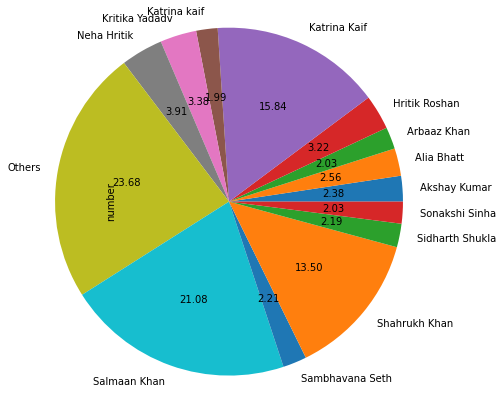

In [18]:
data.plot(kind='pie', autopct='%.2f', radius=2);